#### Installing dependencies
<code>%python main.py</code> is commented out since <code>main.py</code> has already been ran and the model is pre-trained. Model parameters saved in <code> resnet_model_parameters.pth</code>

In [ ]:
%pip install -r requirements.txt
#%python main.py 

#### Importing modules

In [13]:
import torch
import importlib

import utils.model_analyzer
import models.ResNet
import models.BasicBlock
import utils.dataloader

importlib.reload(utils.model_analyzer)
importlib.reload(utils.dataloader)
importlib.reload(models.ResNet)
importlib.reload(models.BasicBlock)

from utils.model_analyzer import ModelAnalyzer
from utils.dataloader import MNISTDataLoader
from models.ResNet import ResNet
from models.BasicBlock import BasicBlock

#### Load model + evaluation

In [6]:
model = ResNet(block = BasicBlock, num_blocks=[2,2,2,2])
checkpoint = torch.load("saved_models/resnet_model_parameters.pth")
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [7]:
ModelAnalyzer.get_model_summary(model)

{'Total Parameters': 11172810, 'Total Layers': 62, 'Model Size (MB)': 42.62}

In [14]:
loader = MNISTDataLoader('.\data')
test_loader = loader.get_test_loader()
accuracy, total = ModelAnalyzer.test_model(model=model, test_loader=test_loader)

In [16]:
print(f'Model accuracy = {accuracy}% on test sample size n={total}')

Model accuracy = 98.3% on test sample size n=10000


To put this in context, the total model size is over 2 orders of magnitude greater than the STM32F SRAM

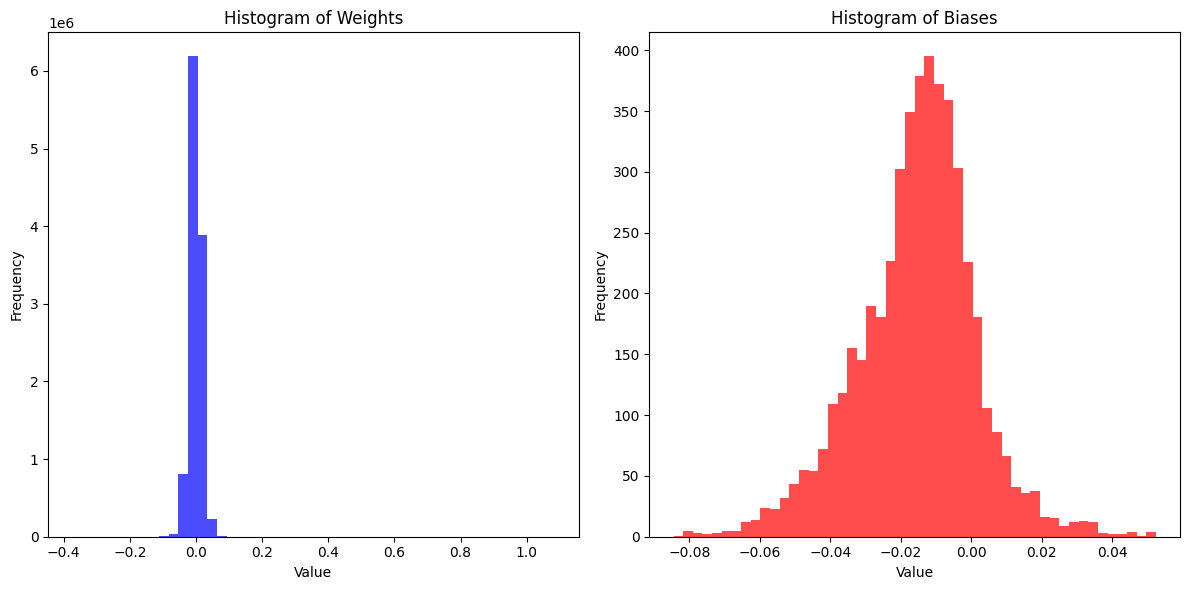

In [8]:
ModelAnalyzer.plot_data_type_distribution(model)